<a href="https://colab.research.google.com/github/shu65/theoretical-numerical-linear-algebra/blob/main/%E7%B7%9A%E5%BD%A2%E8%A8%88%E7%AE%97%E3%81%AE%E6%95%B0%E7%90%86_7_7_1_Arnoldi%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

np.random.seed(1)
a_matrix = np.random.rand(8, 8)
a_matrix

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01],
       [3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
        2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01],
       [4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01,
        8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01],
       [8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
        1.69830420e-01, 8.78142503e-01, 9.83468338e-02, 4.21107625e-01],
       [9.57889530e-01, 5.33165285e-01, 6.91877114e-01, 3.15515631e-01,
        6.86500928e-01, 8.34625672e-01, 1.82882773e-02, 7.50144315e-01],
       [9.88861089e-01, 7.48165654e-01, 2.80443992e-01, 7.89279328e-01,
        1.03226007e-01, 4.47893526e-01, 9.08595503e-01, 2.93614148e-01],
       [2.87775339e-01, 1.30028572e-01, 1.93669579e-02, 6.78835533e-01,
        2.11628116e-01, 2.65546659e-01, 4.91573159e-01, 5.

In [22]:
expected_eigenvalues, expected_eigenvectors = np.linalg.eig(a_matrix)
orders = np.argsort(-np.abs(expected_eigenvalues))
expected_max_eigenvalue = expected_eigenvalues[orders[0]]
for i, order in enumerate(orders):
  print("i:", i)
  print("expected eigenvalue:", expected_eigenvalues[order])
  print("expected eigenvector:")
  print(expected_eigenvectors[:, order])

i: 0
expected eigenvalue: (3.4990240608479932+0j)
expected eigenvector:
[0.20461122+0.j 0.38615184+0.j 0.42029455+0.j 0.32870449+0.j
 0.48522838+0.j 0.38779425+0.j 0.18726684+0.j 0.32160071+0.j]
i: 1
expected eigenvalue: (-0.7342112073003019+0j)
expected eigenvector:
[-0.12461635+0.j  0.06389419+0.j -0.68137611+0.j -0.44228772+0.j
  0.09504254+0.j  0.25478947+0.j  0.18654405+0.j  0.4601598 +0.j]
i: 2
expected eigenvalue: (0.7122756776855365+0j)
expected eigenvector:
[ 0.01223493+0.j  0.03384852+0.j -0.47783921+0.j  0.18157725+0.j
 -0.79539447+0.j  0.29274766+0.j  0.13434495+0.j -0.03165226+0.j]
i: 3
expected eigenvalue: (0.19767751156027363+0.47981972546231816j)
expected eigenvector:
[-0.24419527+0.30805167j -0.27660726-0.17953194j  0.01043494-0.24853952j
 -0.11755664+0.1833224j  -0.19796557+0.24863176j  0.31401936+0.02837889j
  0.46254789+0.j          0.1575493 -0.43385266j]
i: 4
expected eigenvalue: (0.19767751156027363-0.47981972546231816j)
expected eigenvector:
[-0.24419527-0.30805

In [5]:
def arnoldi_iteration(a, x0, m):
  if m > a.shape[0]:
    raise ValueError
  n = a.shape[0]
  h = np.zeros((m, m))
  v = np.zeros((n, m))

  v0 = x0 / np.linalg.norm(x0)
  v[:, 0] = v0

  k = 0
  for k in range(m):
    k = k
    w = a @ v[:, k]
    for j in range(k+1):
        v_j = v[:, j]
        h[j,k] = v_j.T @ w
        w = w - h[j,k]*v_j

    if k+1 < m:
        h[k+1, k] = np.linalg.norm(w)
        v[:, k+1] = w/h[k+1, k]
  return v, h


x0 = np.ones(a_matrix.shape[0])
v, h = arnoldi_iteration(a_matrix, x0, 4)

np.testing.assert_allclose(v.T @ a_matrix @ v, h, rtol=1e-07, atol=1e-07)
h

array([[ 3.58799661, -0.18720508, -0.51641195,  0.09771996],
       [ 0.91564503,  0.19001179, -0.19663412,  0.26556715],
       [ 0.        ,  1.02788666, -0.33965947,  0.39069655],
       [ 0.        ,  0.        ,  0.36023935,  0.07761123]])

In [13]:
def arnoldi_method(a, x0, m):
  v, h = arnoldi_iteration(a=a, x0=x0, m=m)
  
  ritz_values, ritz_vectors = np.linalg.eig(h)
  eigenvectors = v @ ritz_vectors
  return ritz_values, eigenvectors


n = a_matrix.shape[0]
x0 = np.ones(n)
max_abs_eigenvalue_norm_r = []
for m in range(1, n):
  eigenvalues, eigenvectors = arnoldi_method(a_matrix, x0, m)
  orders = np.argsort(-np.abs(eigenvalues))
  print("m", m)
  for i, order in enumerate(orders):
    print("i:", i)
    print("eigenvalue:", eigenvalues[order])
    print("eigenvector:")
    print(eigenvectors[:, order])
    r = a_matrix @ eigenvectors[:, order] - eigenvalues[order] * eigenvectors[:, order]
    norm_r = np.linalg.norm(r)
    print("||r||:", norm_r)
    if i == 0:
      max_abs_eigenvalue_norm_r.append(norm_r)

m 1
i: 0
eigenvalue: 3.587996609195481
eigenvector:
[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
||r||: 0.915645030381127
m 2
i: 0
eigenvalue: 3.5367790030961253
eigenvector:
[0.20068117 0.36470386 0.39209471 0.32823537 0.46329633 0.44007153
 0.19328437 0.34579785]
||r||: 0.2712517417287943
i: 1
eigenvalue: 0.2412293912115118
eigenvector:
[-0.51122961  0.10935109  0.21298449 -0.02862766  0.4823762   0.39450506
 -0.53921544  0.03782009]
||r||: 1.0262823718532643
m 3
i: 0
eigenvalue: 3.49935330371708
eigenvector:
[0.20089168 0.38808985 0.42152325 0.33202793 0.48017663 0.3884742
 0.1884522  0.32265829]
||r||: 0.02528352404705274
i: 1
eigenvalue: -0.15459166993216905
eigenvector:
[-0.0425295   0.40328728  0.50788455  0.10375742  0.38764815 -0.58027245
 -0.1181124  -0.25671104]
||r||: 0.35088613454759704
i: 2
eigenvalue: 0.0935872889728065
eigenvector:
[-0.14911496  0.40416407  0.52473542  0.09384656  0.47166597 -0.45230333
 -0.2259161  -0.22842

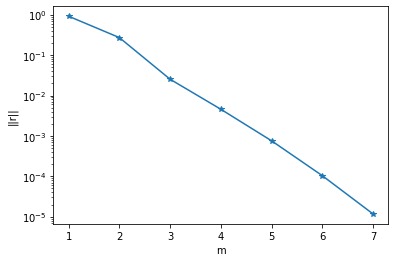

In [21]:
%matplotlib inline
 
import matplotlib.pyplot as plt
plt.plot(np.arange(1, n), max_abs_eigenvalue_norm_r, marker='*')
plt.yscale('log')
plt.xlabel("m")
plt.ylabel("||r||")
plt.show()